<a href="https://colab.research.google.com/github/rioferdiansyah024/PCVK_Genap_2021/blob/main/Minggu_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab.patches import cv2_imshow
from PIL import Image as im
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Konvulusi tanpa Library**

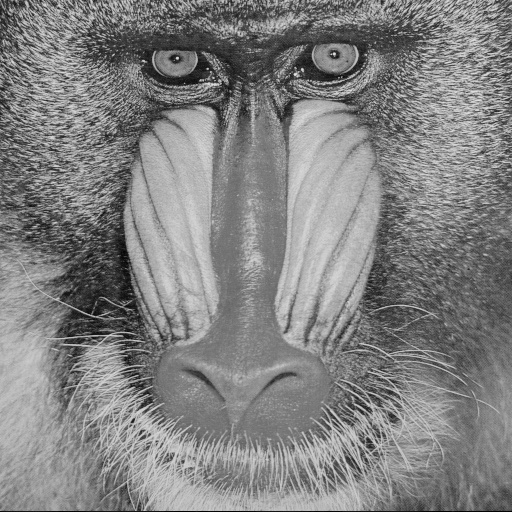

In [4]:
original = cv2.imread('/content/drive/MyDrive/mandrill.tiff')
img_gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

# **EMBOSS**

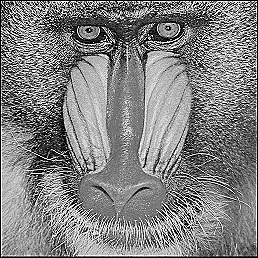

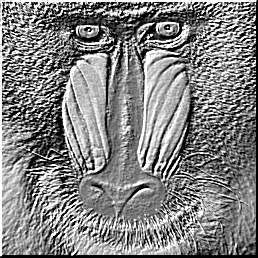

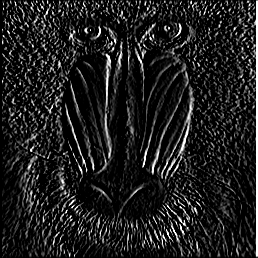

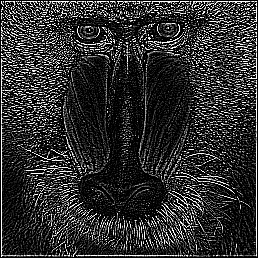

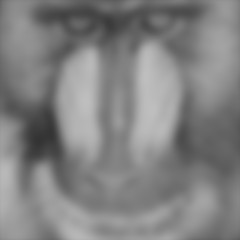

In [5]:
def convolution2d(image, kernel, stride, padding):

  # add paddinng
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # pick img input width and height values including insertion pad
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  """
  Formula to find the output size using convolution:
    [W-K+2SP/S]+1
  W = input img size (width/height)
  K = kernel size
  P = padding size
  S = stride value


  """
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

original = cv2.imread('/content/drive/MyDrive/mandrill.tiff')
img = cv2.resize(original, (0,0), fx=0.5, fy=0.5) 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



# image sharpen
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
# emboss
kernal_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])


# left sobel edge detection
kernal_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])


# canny edge detection
kernal_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])


cv2_imshow(convolution2d(img_gray,kernal_sharpen,1,2))


cv2_imshow(convolution2d(img_gray,kernal_emboss,1,2))
cv2_imshow(convolution2d(img_gray,kernal_sobel,1,2))
cv2_imshow(convolution2d(img_gray,kernal_canny,1,2))


kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))
